Import libs

In [1]:
import numpy
import matplotlib.pyplot as plotlib
import librosa
import librosa.display
import IPython.display
import pandas

Load audio file

In [2]:
sfile, sr = librosa.load('kingsLoop.wav', mono=True, sr=None)

Import csv file into data frame

In [10]:
csv_data = pandas.read_csv('./SonicAnnotatorCSVs/kingsLoop_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv', header=None)
csv_data

,0
0,0.011610
1,0.208980
2,0.417959
3,0.626939
4,0.835918
5,1.056508
6,1.265488
7,1.474467
8,1.695057
9,1.892426


Get times of all events in the csv

In [9]:
csv_times = csv_data.loc[:,0]
csv_times

0     0.011610
1     0.208980
2     0.417959
3     0.626939
4     0.835918
5     1.056508
6     1.265488
7     1.474467
8     1.695057
9     1.892426
10    2.113016
11    2.321995
12    2.530975
13    2.739955
14    2.960544
15    3.169524
16    3.378503
17    3.587483
18    3.796463
19    4.017052
20    4.214422
21    4.423401
22    4.643991
23    4.864580
24    5.073560
25    5.270930
26    5.491519
27    5.700499
28    5.909478
29    6.118458
30    6.339048
31    6.548027
Name: 0, dtype: float64

Get the audio file's frequency-domain info

In [12]:
mags_phases = librosa.stft(sfile, n_fft=4096)

Throw out the phase info and convert the amplitude info into dB

In [13]:
mags = numpy.abs(mags_phases)
mags_db = librosa.amplitude_to_db(mags, ref=numpy.max)

Plot the frequency info

Text(0.5, 1.0, 'Estimated from Sonic Visualiser')

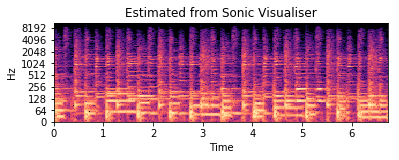

In [19]:
plotlib.figure()
plotlib.subplot(2, 1, 1)
librosa.display.specshow(mags_db, x_axis='time', y_axis='log')
plotlib.title('Estimated from Sonic Visualiser')